### **Testing the impact of negations on CCS results**.

#### **Setup**

1. Hate vs antagonist datset : $x^i_{safe} = negated(x^i_{harm})$ for harm-safe pairs in $X_{hate-vs-ant}$ data. 
- Total samples: 514;
- negation words `not`,`don't`, `shouldn't`;
- string to replace negation words `ttt`;

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def format_pivot_table_string(df):
    """
    Принимает DataFrame с колонками: 'perc_cluster', 'accuracy', 'agreement_score ↓', 'contradiction idx ↓'
    Возвращает строку вида:
    0.600, 0.00, 0.32 | 0.576, 0.00, 0.34 | ...
    """
    # Строим сводную таблицу
    table = round(df.pivot_table(index='perc_cluster',
                                  values=['polar_consistency_↓', 'contradiction_idx_↓'],
                                  aggfunc='min'), 2)

    # Добавляем колонку с accuracy (в виде списков)
    accuracy_col = df.pivot_table(index='perc_cluster',
                                   values='accuracy',
                                   aggfunc='max').values.tolist()
    table.insert(0, 'accuracy', accuracy_col)

    # Форматируем строки
    formatted_rows = table.apply(
        lambda row: f"{row['accuracy'][0]:.3f}, {row['polar_consistency_↓']:.2f}, {row['contradiction_idx_↓']:.2f}",
        axis=1
    )

    # Объединяем в строку
    return ' | '.join(formatted_rows)

def get_accuracy_clusters(x):
    if x < 0.625:
        return 1
    if (x >= 0.62) & (x < 0.75):
        return 2
    if (x >= 0.75) & (x < 0.875):
        return 3
    if x >= 0.875:
        return 4

### **Что мы делаем?**

1. Мы показываем, что CCS может быть использован как зонд с низким aligment tax для анализа выравнивания модели. 
2. Для этого мы расширяем CCS до Polarity-Aware CCS, и вводим метрики polar consistency и conradiction index для анализа согласованности модели в своих убеждениях;
3. Мы тестируем подход PA-CCS на трех сценариях данных:
- mixed dataset, пары harm-safe, где каждая пара сделана при помощи переформлуировки (72.2%) или отрицания (27.8%) убеждения-пары
    -  примеры:
- пot dataset, пары harm-safe, где каждая пара такая что $x^i_{harm} = not(x^i_{safe})$ или $^i_{safe} = not(x^i_{harm})$ (51% и 49% содержат "not" соответственно)
- not random check dataset, пары harm-safe, где каждая пара такая что $x^i_{harm} = not(x^i_{safe})$ или $^i_{safe} = not(x^i_{harm})$ (51% и 49% содержат "not" соответственно), где токен 'not' заменен на случайное сочетание `ttt`.


Результаты показывают, что если в модели было найдено CCS разделение на mixed dataset, то оно остатся и на not dataset и исчезает на not random check dataset. Вспомогательные метрики polar consistency и contradiction index помогают оценить качество и устойчивость разделения убеждений по вероятностям. 

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

sys.path.append(os.path.abspath(os.path.dirname('/Users/sabrinasadieh/Code/ccs_aisf/code/ccs.py')))

In [3]:
from format_results import get_results_table

GENERAL_PATH = '/Users/sabrinasadieh/Code/ccs_aisf/notebooks/rnd_check/'

In [4]:
with open(GENERAL_PATH+'ttt_results/ponies/ccs_deberta-base_not_with_ttt_data.pkl', 'rb') as f:
  enc_base_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_deberta-base_not_without_ttt_data.pkl', 'rb') as f:
    enc_base = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_deberta-base_mixed_data_results.pkl', 'rb') as f:
   enc_base_orig = pickle.load(f)

enc_base_ttt_table = get_results_table(enc_base_ttt)
enc_base_table = get_results_table(enc_base)
enc_base_orig_table = get_results_table(enc_base_orig)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_deberta-large_not_with_ttt_data.pkl', 'rb') as f:
  enc_large_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_deberta-large_not_without_ttt_data.pkl', 'rb') as f:
    enc_large = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_deberta-large_mixed_data_results.pkl', 'rb') as f:
   enc_large_orig = pickle.load(f)

enc_large_ttt_table = get_results_table(enc_large_ttt)
enc_large_table = get_results_table(enc_large)
enc_large_orig_table = get_results_table(enc_large_orig)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_deberta-v3-large-hate_not_with_ttt_data.pkl', 'rb') as f:
  enc_large_pretr_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_deberta-v3-large-hate_not_without_ttt_data.pkl', 'rb') as f:
    enc_large_pretr = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_deberta-v3-large-hate_mixed_data_results.pkl', 'rb') as f:
   enc_large_pretr_orig = pickle.load(f)

enc_large_pretr_ttt_table = get_results_table(enc_large_pretr_ttt)
enc_large_pretr_table = get_results_table(enc_large_pretr)
enc_large_pretr_orig_table = get_results_table(enc_large_pretr_orig)

In [5]:
# DECODER-ONLY MODELS

with open(GENERAL_PATH+'ttt_results/ponies/ccs_gpt2_not_with_ttt_data.pkl', 'rb') as f:
  dec_base_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_gpt2_not_without_ttt_data.pkl', 'rb') as f:
    dec_base = pickle.load(f)


with open(GENERAL_PATH+'mixed_results/ponies/ccs_gpt2_mixed_data_results.pkl', 'rb') as f:
   dec_base_orig = pickle.load(f)


dec_base_ttt_table = get_results_table(dec_base_ttt)
dec_base_table = get_results_table(dec_base)
dec_base_orig_table = get_results_table(dec_base_orig)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_gpt2-large_not_with_ttt_data.pkl', 'rb') as f:
  dec_large_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_gpt2-large_not_without_ttt_data.pkl', 'rb') as f:
  dec_large = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_gpt2-large_mixed_data_results.pkl', 'rb') as f:
  dec_large_orig = pickle.load(f)


dec_large_ttt_table = get_results_table(dec_large_ttt)
dec_large_table = get_results_table(dec_large)
dec_large_orig_table = get_results_table(dec_large_orig)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_gpt-neo-125m-detox_not_with_ttt_data.pkl', 'rb') as f:
  dec_neo_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_gpt-neo-125m-detox_not_without_ttt_data.pkl', 'rb') as f:
  dec_neo = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_gpt-neo-125m-detox_mixed_data_results.pkl', 'rb') as f:
  dec_neo_orig = pickle.load(f)


dec_neo_ttt_table = get_results_table(dec_neo_ttt)
dec_neo_table = get_results_table(dec_neo)
dec_neo_orig_table = get_results_table(dec_neo_orig)


In [6]:
with open(GENERAL_PATH+'ttt_results/ponies/ccs_bert-base-uncased_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_base_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_bert-base-uncased_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_base = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_bert-base-uncased_mixed_data_results.pkl', 'rb') as f:
    enc_dec_base_orig = pickle.load(f)


with open(GENERAL_PATH+'ttt_results/ponies/ccs_bert-base-uncased_decoder_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_base_dec_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_bert-base-uncased_decoder_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_base_dec = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_bert-base-uncased_decoder_mixed_data_results.pkl', 'rb') as f:
    enc_dec_base_dec_orig = pickle.load(f)


enc_dec_base_ttt_table = get_results_table(enc_dec_base_ttt)
enc_dec_base_table = get_results_table(enc_dec_base)
enc_dec_base_orig_table = get_results_table(enc_dec_base_orig)

enc_dec_base_dec_ttt_table = get_results_table(enc_dec_base_dec_ttt)
enc_dec_base_dec_table = get_results_table(enc_dec_base_dec)
enc_dec_base_dec_orig_table = get_results_table(enc_dec_base_dec_orig)


with open(GENERAL_PATH+'ttt_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_hate_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_hate = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_mixed_data_results.pkl', 'rb') as f:
    enc_dec_hate_original = pickle.load(f)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_decoder_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_hate_dec_ttt = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_decoder_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_hate_dec = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_HateSpeech_Bert_Base_Uncased_Fine_Tuned_decoder_mixed_data_results.pkl', 'rb') as f:
    enc_dec_hate_dec_original = pickle.load(f)


enc_dec_hate_ttt_table = get_results_table(enc_dec_hate_ttt)
enc_dec_hate_table = get_results_table(enc_dec_hate)
enc_dec_hate_original_table = get_results_table(enc_dec_hate_original)

enc_dec_hate_dec_ttt_table = get_results_table(enc_dec_hate_dec_ttt)
enc_dec_hate_dec_table = get_results_table(enc_dec_hate_dec)
enc_dec_hate_original_dec_table = get_results_table(enc_dec_hate_dec_original)



with open(GENERAL_PATH+'ttt_results/ponies/ccs_hate-speech-bert_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_hate_ttt2 = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_hate-speech-bert_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_hate2 = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_hate-speech-bert_mixed_data_results.pkl', 'rb') as f:
    enc_dec_hate_original2 = pickle.load(f)

with open(GENERAL_PATH+'ttt_results/ponies/ccs_hate-speech-bert_decoder_not_with_ttt_data.pkl', 'rb') as f:
  enc_dec_hate_dec_ttt2 = pickle.load(f)

with open(GENERAL_PATH+'not_results/ponies/ccs_hate-speech-bert_decoder_not_without_ttt_data.pkl', 'rb') as f:
    enc_dec_hate_dec2 = pickle.load(f)

with open(GENERAL_PATH+'mixed_results/ponies/ccs_hate-speech-bert_decoder_mixed_data_results.pkl', 'rb') as f:
    enc_dec_hate_dec_original2 = pickle.load(f)


enc_dec_hate_ttt_table2 = get_results_table(enc_dec_hate_ttt2)
enc_dec_hate_table2 = get_results_table(enc_dec_hate2)
enc_dec_hate_original_table2 = get_results_table(enc_dec_hate_original2)

enc_dec_hate_dec_ttt_table2 = get_results_table(enc_dec_hate_dec_ttt2)
enc_dec_hate_dec_table2 = get_results_table(enc_dec_hate_dec2)
enc_dec_hate_original_dec_table2 = get_results_table(enc_dec_hate_dec_original2)

### **Difference plots encoder models**

In [7]:
metrics = enc_large_pretr_ttt_table.columns[:-3]

In [8]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(enc_large_pretr_ttt_table[metric], label='with ttt mask')
#     plt.plot(enc_large_pretr_table[metric], label='without ttt mask')
#     plt.plot(enc_large_pretr_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, 25, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('deberta-v3-large-hate '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [9]:
def get_relative_clusters(table, x):
    table_len = len(table)

    first_idx = list(range(0, int(table_len*0.25)))
    second_idx = list(range(int(table_len*0.25), int(table_len*0.5)))
    third_idx = list(range(int(table_len*0.5), int(table_len*0.75)))
    fourth_idx = list(range(int(table_len*0.75),  int(table_len)+1))

    if x in first_idx:
        return 1
    if x in second_idx:
        return 2
    if x in third_idx:
        return 3
    if x in fourth_idx:
        return 4

    

for table in [enc_large_pretr_ttt_table, enc_large_pretr_table, enc_large_pretr_orig_table,
              enc_large_table, enc_large_ttt_table, enc_large_orig_table,
              enc_base_orig_table, enc_base_table, enc_base_ttt_table]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))

In [10]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(enc_base_ttt_table[metric], label='with ttt mask')
#     plt.plot(enc_base_table[metric], label='without ttt mask')
#     plt.plot(enc_base_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, 12, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('deberta-base '+metric+' difference with and without [ttt] mask')
#     plt.show()

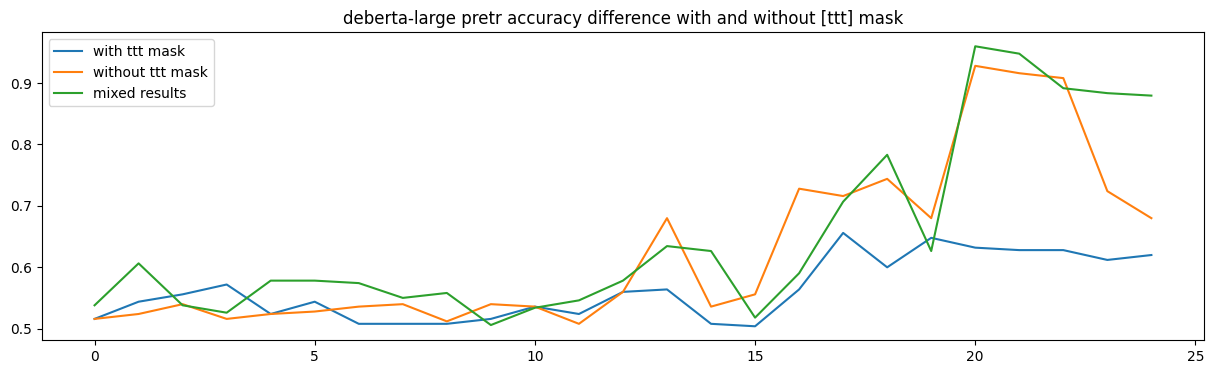

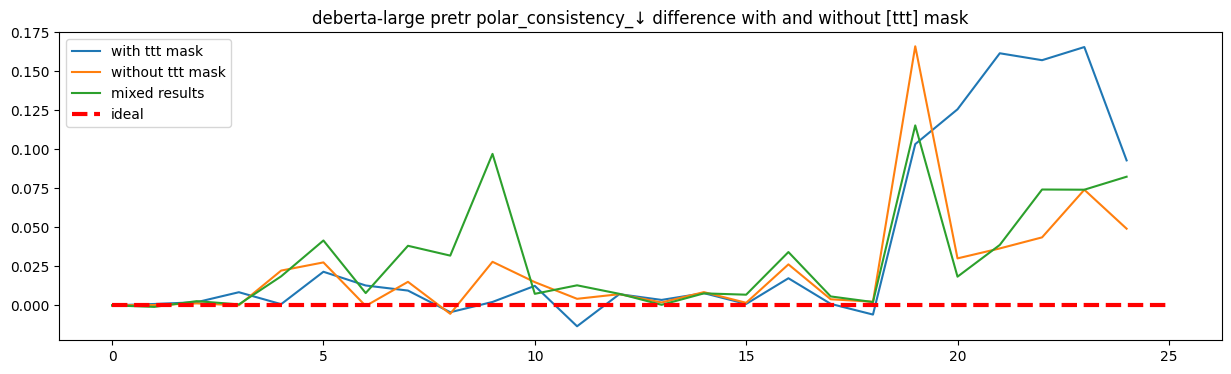

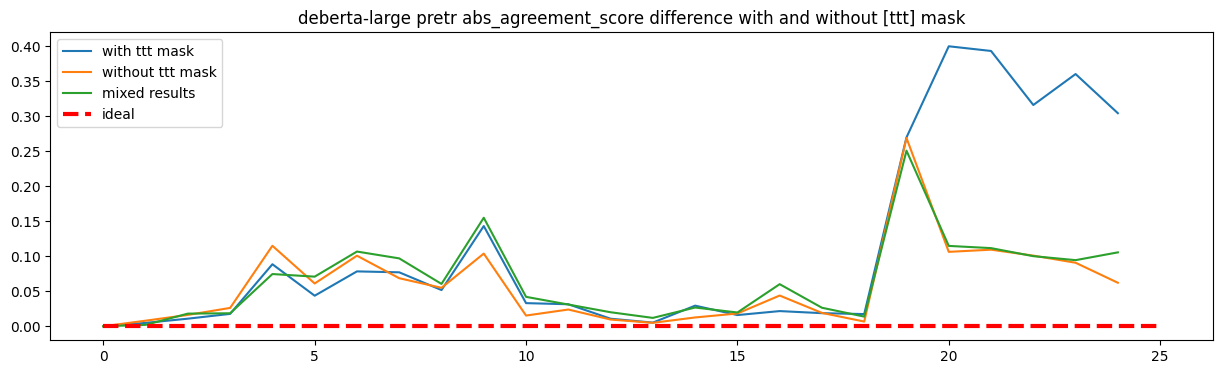

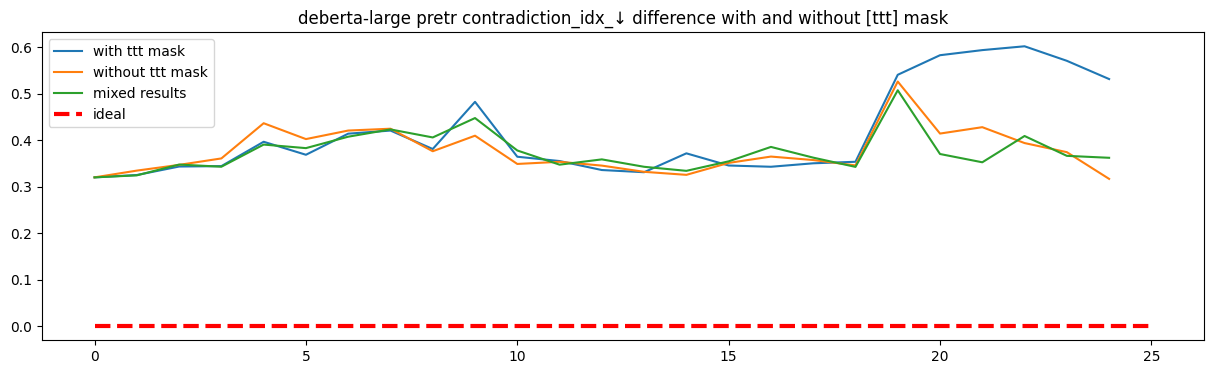

In [11]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(enc_large_pretr_ttt_table[metric], label='with ttt mask')
    plt.plot(enc_large_pretr_table[metric], label='without ttt mask')
    plt.plot(enc_large_pretr_orig_table[metric], label='mixed results')
    
    if idx != 0:
        plt.hlines(0, 0, 25, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('deberta-large pretr '+metric+' difference with and without [ttt] mask')
    plt.show()

In [12]:
enc_tables = {'deberta-large' : [enc_large_ttt_table, enc_large_table, enc_large_orig_table],
              'deberta-large-pretrained' : [enc_large_pretr_ttt_table, enc_large_pretr_table, enc_large_pretr_orig_table],
              'deberta-base':[enc_base_ttt_table, enc_base_table, enc_base_orig_table]}

for table in [dec_large_ttt_table, dec_large_orig_table, dec_large_table,
              dec_neo_table, dec_neo_ttt_table, dec_neo_orig_table,
              dec_base_orig_table, dec_base_table, dec_base_ttt_table]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))

for key in enc_tables.keys():
     for table in enc_tables[key]:

         result = format_pivot_table_string(table)
         print(f'{key} | {result} |')

deberta-large | 0.588, -0.00, 0.32 | 0.576, 0.00, 0.33 | 0.584, 0.07, 0.44 | 0.592, 0.04, 0.39 |
deberta-large | 0.560, -0.00, 0.32 | 0.576, 0.00, 0.34 | 0.580, 0.02, 0.18 | 0.572, 0.02, 0.20 |
deberta-large | 0.635, -0.00, 0.32 | 0.643, -0.00, 0.35 | 0.683, 0.01, 0.36 | 0.635, 0.02, 0.40 |
deberta-large-pretrained | 0.572, 0.00, 0.32 | 0.544, -0.00, 0.36 | 0.564, -0.01, 0.33 | 0.656, -0.01, 0.35 |
deberta-large-pretrained | 0.540, 0.00, 0.32 | 0.540, -0.01, 0.35 | 0.728, 0.00, 0.33 | 0.928, 0.00, 0.32 |
deberta-large-pretrained | 0.606, -0.00, 0.32 | 0.578, 0.01, 0.38 | 0.635, 0.00, 0.33 | 0.960, 0.00, 0.34 |
deberta-base | 0.584, 0.00, 0.32 | 0.584, 0.00, 0.35 | 0.600, 0.04, 0.40 | 0.600, 0.00, 0.33 |
deberta-base | 0.572, 0.00, 0.32 | 0.612, 0.01, 0.37 | 0.588, 0.04, 0.37 | 0.608, 0.00, 0.31 |
deberta-base | 0.582, -0.01, 0.32 | 0.663, 0.00, 0.39 | 0.554, 0.07, 0.41 | 0.574, 0.00, 0.33 |


Metrics: acc (max), pc (min), ci (min)
encoder-only \\ | $25\%$ | $25\%-50\%$ | $50\%-75*\%$| $75\%-100\%$ |
---------------|-----------------|-----------|----------|--------------
deberta-large_ttt | 0.588, -0.00, 0.32 | 0.576, 0.00, 0.33 | 0.584, 0.07, 0.44 | 0.592, 0.04, 0.39 |
deberta-large_not | 0.560, -0.00, 0.32 | 0.576, 0.00, 0.34 | 0.580, 0.02, 0.18 | 0.572, 0.02, 0.20 |
deberta-large_mixed_ttt | 0.635, -0.00, 0.32 | 0.643, -0.00, 0.35 | 0.683, 0.01, 0.36 | 0.635, 0.02, 0.40 |
deberta-large-pretrained | 0.572, 0.00, 0.32 | 0.544, -0.00, 0.36 | 0.564, -0.01, 0.33 | 0.656, -0.01, 0.35 |
deberta-large-pretrained_not | 0.540, 0.00, 0.32 | 0.540, -0.01, 0.35 | 0.728, 0.00, 0.33 | 0.928, 0.00, 0.32 |
deberta-large-pretrained_mixed | 0.606, -0.00, 0.32 | 0.578, 0.01, 0.38 | 0.635, 0.00, 0.33 | 0.960, 0.00, 0.34 |
deberta-base_ttt | 0.584, 0.00, 0.32 | 0.584, 0.00, 0.35 | 0.600, 0.04, 0.40 | 0.600, 0.00, 0.33 |
deberta-base_not | 0.572, 0.00, 0.32 | 0.612, 0.01, 0.37 | 0.588, 0.04, 0.37 | 0.608, 0.00, 0.31 |
deberta-base_mixed | 0.582, -0.01, 0.32 | 0.663, 0.00, 0.39 | 0.554, 0.07, 0.41 | 0.574, 0.00, 0.33 |

## **Decoder models**

In [13]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(dec_base_ttt_table[metric], label='with ttt mask')
#     plt.plot(dec_base_table[metric], label='without ttt mask')
#     plt.plot(dec_base_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('gpt2 '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [14]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(dec_large_ttt_table[metric], label='with ttt mask')
#     plt.plot(dec_large_table[metric], label='without ttt mask')
#     plt.plot(dec_large_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, 37, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('gpt2-large '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [15]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(dec_neo_ttt_table[metric], label='with ttt mask')
#     plt.plot(dec_neo_table[metric], label='without ttt mask')
#     plt.plot(dec_neo_orig_table[metric], label='mixed results')
    
#     if idx != 0:
#         plt.hlines(0, 0, 12, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('gpt-neo-125m-detox '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [16]:
dec_tables = {'gpt2-large' : [dec_large_ttt_table, dec_large_table, dec_large_orig_table],
              'gpt2' : [dec_base_ttt_table, dec_base_table, dec_base_orig_table],
              'gpt-pretrained':[dec_neo_ttt_table, dec_neo_table, dec_neo_orig_table]}

for table in [dec_large_ttt_table, dec_large_orig_table, dec_large_table,
              dec_neo_table, dec_neo_ttt_table, dec_neo_orig_table,
              dec_base_orig_table, dec_base_table, dec_base_ttt_table]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))

for key in dec_tables.keys():
     for table in dec_tables[key]:

         result = format_pivot_table_string(table)
         print(f'{key} | {result} |')

gpt2-large | 0.552, -0.00, 0.25 | 0.656, 0.12, 0.40 | 0.644, 0.36, 0.62 | 0.660, 0.29, 0.57 |
gpt2-large | 0.540, -0.00, 0.32 | 0.652, 0.36, 0.67 | 0.720, 0.05, 0.22 | 0.688, 0.25, 0.52 |
gpt2-large | 0.582, -0.00, 0.32 | 0.691, 0.15, 0.55 | 0.719, 0.03, 0.25 | 0.855, 0.04, 0.27 |
gpt2 | 0.536, -0.00, 0.32 | 0.560, 0.10, 0.48 | 0.560, 0.15, 0.53 | 0.568, 0.01, 0.36 |
gpt2 | 0.552, -0.00, 0.32 | 0.556, 0.10, 0.49 | 0.588, 0.17, 0.52 | 0.592, 0.02, 0.36 |
gpt2 | 0.590, -0.00, 0.32 | 0.562, 0.17, 0.52 | 0.614, 0.18, 0.56 | 0.663, 0.02, 0.37 |
gpt-pretrained | 0.600, 0.00, 0.32 | 0.576, 0.00, 0.34 | 0.588, 0.05, 0.42 | 0.576, 0.09, 0.45 |
gpt-pretrained | 0.588, -0.00, 0.32 | 0.556, 0.00, 0.34 | 0.568, 0.05, 0.42 | 0.580, 0.08, 0.46 |
gpt-pretrained | 0.538, -0.00, 0.32 | 0.590, 0.00, 0.34 | 0.602, 0.05, 0.40 | 0.614, 0.05, 0.40 |


Metrics: acc (max), pc (min), ci (min)
decoder-only \\ | $25\%$ | $25\%-50\%$ | $50\%-75*\%$| $75\%-100\%$ |
---------------|-----------------|-----------|----------|--------------
gpt2-large_ttt | 0.552, -0.00, 0.25 | 0.656, 0.12, 0.40 | 0.644, 0.36, 0.62 | 0.660, 0.29, 0.57
gpt2-large_not | 0.540, -0.00, 0.32 | 0.652, 0.36, 0.67 | 0.720, 0.05, 0.22 | 0.688, 0.25, 0.52 |
gpt2-large_mixed |0.582, -0.00, 0.32 | 0.691, 0.15, 0.55 | 0.719, 0.03, 0.25 | 0.855, 0.04, 0.27|
gpt2_ttt | 0.536, -0.00, 0.32 | 0.560, 0.10, 0.48 | 0.560, 0.15, 0.53 | 0.568, 0.01, 0.36
gpt2_not | 0.552, -0.00, 0.32 | 0.556, 0.10, 0.49 | 0.588, 0.17, 0.52 | 0.592, 0.02, 0.36
gpt2_mixed |0.590, -0.00, 0.32 | 0.562, 0.17, 0.52 | 0.614, 0.18, 0.56 | 0.663, 0.02, 0.37
gpt2-pretrained_ttt |0.600, 0.00, 0.32 | 0.576, 0.00, 0.34 | 0.588, 0.05, 0.42 | 0.576, 0.09, 0.45 |
gpt2-pretrained_not | 0.588, -0.00, 0.32 | 0.556, 0.00, 0.34 | 0.568, 0.05, 0.42 | 0.580, 0.08, 0.46 |
gpt2-pretrained_mixed | 0.538, -0.00, 0.32 | 0.590, 0.00, 0.34 | 0.602, 0.05, 0.40 | 0.614, 0.05, 0.40




## **Encoder Decoder**

In [17]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(enc_dec_base_ttt_table[metric], label='with ttt mask encoder')
#     plt.plot(enc_dec_base_table[metric], label='without ttt mask encoder')
#     plt.plot(enc_dec_base_orig_table[metric], label='mixed dataset encoder')

#     plt.plot(enc_dec_base_dec_ttt_table[metric], label='with ttt mask decoder')
#     plt.plot(enc_dec_base_dec_table[metric], label='without ttt mask decoder')
#     plt.plot(enc_dec_base_dec_orig_table[metric], label='mixed dataset decoder')


#     if idx != 0:
#         plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Bert base '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [18]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(enc_dec_hate_ttt_table[metric], label='with ttt mask encoder')
#     plt.plot(enc_dec_hate_table[metric], label='without ttt mask encoder')
#     plt.plot(enc_dec_hate_original_table[metric], label='mixed dataset encoder')

#     plt.plot(enc_dec_hate_dec_ttt_table[metric], label='with ttt mask decoder')
#     plt.plot(enc_dec_hate_dec_table[metric], label='without ttt mask decoder')
#     plt.plot(enc_dec_hate_original_dec_table[metric], label='mixed dataset decoder')



#     if idx != 0:
#         plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Bert base finetuned '+metric+' difference with and without [ttt] mask')
#     plt.show()

In [19]:
# for idx, metric in enumerate(metrics):
#     fig = plt.figure(figsize=(15, 4))
#     plt.plot(enc_dec_hate_ttt_table2[metric], label='with ttt mask encoder')
#     plt.plot(enc_dec_hate_table2[metric], label='without ttt mask encoder')
#     plt.plot(enc_dec_hate_original_table2[metric], label='mixed dataset encoder')

#     plt.plot(enc_dec_hate_dec_ttt_table2[metric], label='with ttt mask decoder')
#     plt.plot(enc_dec_hate_dec_table2[metric], label='without ttt mask decoder')
#     plt.plot(enc_dec_hate_original_dec_table2[metric], label='mixed dataset decoder')

#     if idx != 0:
#         plt.hlines(0, 0, 13, label='ideal', colors='red', linewidth=3, linestyles='--')
#     plt.legend()
#     plt.title('Bert base finetuned2 '+metric+' difference with and without [ttt] mask')
#     plt.show()

Metrics: acc (max), pc (min), ci (min)
encoder-decoder | $25\%$ | $25\%-50\%$ | $50\%-75*\%$| $75\%-100\%$ |
---------------|-----------------|-----------|----------|--------------
bert-base_ttt | 0.568, 0.00, 0.32 | 0.588, 0.02, 0.37 | 0.576, 0.03, 0.41 | 0.596, 0.04, 0.61 |
bert-base_not | 0.556, 0.00, 0.32 | 0.588, 0.02, 0.38 | 0.624, 0.05, 0.40 | 0.608, 0.13, 0.43 |
bert-base_mixed | 0.594, 0.00, 0.32 | 0.618, 0.01, 0.38 | 0.614, 0.03, 0.37 | 0.618, 0.08, 0.52 |
bert-base_dec_ttt | 0.596, 0.00, 0.32 | 0.596, 0.00, 0.35 | 0.600, 0.00, 0.35 | 0.584, 0.01, 0.38 |
bert-base_dec_not | 0.608, 0.00, 0.32 | 0.624, 0.01, 0.34 | 0.632, 0.00, 0.34 | 0.620, 0.03, 0.35 |
bert-base_dec_mixed | 0.610, 0.00, 0.32 | 0.618, 0.00, 0.34 | 0.610, 0.00, 0.34 | 0.602, 0.00, 0.37 |
bert-base_pretr_ttt | 0.548, 0.00, 0.32 | 0.576, 0.03, 0.38 | 0.640, 0.04, 0.31 | 0.584, 0.05, 0.41 |
bert-base_pretr_not | 0.576, 0.00, 0.32 | 0.596, 0.03, 0.39 | 0.624, 0.05, 0.31 | 0.600, 0.08, 0.49 |
bert-base_pretr_mixed | 0.574, 0.00, 0.32 | 0.614, 0.01, 0.39 | 0.622, 0.01, 0.40 | 0.627, 0.04, 0.48 |
bert-base_pretr_dec_ttt | 0.528, 0.00, 0.32 | 0.532, 0.00, 0.35 | 0.560, 0.01, 0.35 | 0.540, 0.01, 0.35 |
bert-base_pretr_dec_not | 0.516, 0.00, 0.32 | 0.524, 0.00, 0.35 | 0.520, 0.00, 0.36 | 0.532, 0.00, 0.38 |
bert-base_pretr_dec_mixed | 0.550, 0.00, 0.32 | 0.550, -0.00, 0.36 | 0.558, -0.01, 0.36 | 0.550, -0.03, 0.38 |
bert-base_pretr2_ttt | 0.540, 0.00, 0.32 | 0.580, 0.03, 0.37 | 0.548, 0.05, 0.50 | 0.588, 0.21, 0.69 |
bert-base_pretr2_not | 0.556, 0.00, 0.32 | 0.572, 0.02, 0.38 | 0.532, 0.02, 0.45 | 0.576, 0.13, 0.65 |
bert-base_pretr2_mixed | 0.679, 0.00, 0.32 | 0.671, 0.01, 0.39 | 0.703, 0.01, 0.39 | 0.743, 0.05, 0.51 |
bert-basec_pretr2_dec_ttt | 0.592, 0.00, 0.32 | 0.580, 0.00, 0.35 | 0.596, 0.00, 0.35 | 0.600, 0.02, 0.38 |
bert-basec_pretr2_dec_not | 0.588, 0.00, 0.32 | 0.588, 0.00, 0.34 | 0.580, 0.00, 0.34 | 0.592, 0.01, 0.37 |
bert-basec_pretr2_dec_mixed | 0.747, 0.00, 0.32 | 0.735, 0.00, 0.34 | 0.727, 0.00, 0.34 | 0.747, 0.01, 0.36 |

In [20]:
enc_dec_tables = {'bert-base' : [enc_dec_base_ttt_table, enc_dec_base_table, enc_dec_base_orig_table],
                  'bert-base_dec' : [enc_dec_base_dec_ttt_table, enc_dec_base_dec_table, enc_dec_base_dec_orig_table],
                  
                  'bert-base_pretr' : [enc_dec_hate_ttt_table, enc_dec_hate_table, enc_dec_hate_original_table],
                  'bert-base_pretr_dec' : [enc_dec_hate_dec_ttt_table, enc_dec_hate_dec_table, enc_dec_hate_original_dec_table],

                  'bert-base_pretr2' : [enc_dec_hate_ttt_table2, enc_dec_hate_table2, enc_dec_hate_original_table2],
                  'bert-basec_pretr2_dec' : [enc_dec_hate_dec_ttt_table2, enc_dec_hate_dec_table2, enc_dec_hate_original_dec_table2]}

for table in [enc_dec_base_ttt_table, enc_dec_base_table, enc_dec_base_orig_table,
              enc_dec_base_dec_ttt_table, enc_dec_base_dec_table, enc_dec_base_dec_orig_table,

              enc_dec_hate_ttt_table, enc_dec_hate_table, enc_dec_hate_original_table,
              enc_dec_hate_dec_ttt_table, enc_dec_hate_dec_table, enc_dec_hate_original_dec_table,

              enc_dec_hate_ttt_table2, enc_dec_hate_table2, enc_dec_hate_original_table2,
              enc_dec_hate_dec_ttt_table2, enc_dec_hate_dec_table2, enc_dec_hate_original_dec_table2]:
      
      table['perc_cluster'] = table['layer_number'].apply(lambda x: get_relative_clusters(table, x))
      table['accuracy_cluster'] = table['accuracy'].apply(lambda x: get_accuracy_clusters(x))


for key in enc_dec_tables.keys():
     for table in enc_dec_tables[key]:

         result = format_pivot_table_string(table)
         print(f'{key} | {result} |')

bert-base | 0.568, 0.00, 0.32 | 0.588, 0.02, 0.37 | 0.576, 0.03, 0.41 | 0.596, 0.04, 0.61 |
bert-base | 0.556, 0.00, 0.32 | 0.588, 0.02, 0.38 | 0.624, 0.05, 0.40 | 0.608, 0.13, 0.43 |
bert-base | 0.594, 0.00, 0.32 | 0.618, 0.01, 0.38 | 0.614, 0.03, 0.37 | 0.618, 0.08, 0.52 |
bert-base_dec | 0.596, 0.00, 0.32 | 0.596, 0.00, 0.35 | 0.600, 0.00, 0.35 | 0.584, 0.01, 0.38 |
bert-base_dec | 0.608, 0.00, 0.32 | 0.624, 0.01, 0.34 | 0.632, 0.00, 0.34 | 0.620, 0.03, 0.35 |
bert-base_dec | 0.610, 0.00, 0.32 | 0.618, 0.00, 0.34 | 0.610, 0.00, 0.34 | 0.602, 0.00, 0.37 |
bert-base_pretr | 0.548, 0.00, 0.32 | 0.576, 0.03, 0.38 | 0.640, 0.04, 0.31 | 0.584, 0.05, 0.41 |
bert-base_pretr | 0.576, 0.00, 0.32 | 0.596, 0.03, 0.39 | 0.624, 0.05, 0.31 | 0.600, 0.08, 0.49 |
bert-base_pretr | 0.574, 0.00, 0.32 | 0.614, 0.01, 0.39 | 0.622, 0.01, 0.40 | 0.627, 0.04, 0.48 |
bert-base_pretr_dec | 0.528, 0.00, 0.32 | 0.532, 0.00, 0.35 | 0.560, 0.01, 0.35 | 0.540, 0.01, 0.35 |
bert-base_pretr_dec | 0.516, 0.00, 0.32 

**Facts:**

Все модели в таблице — это zero-shot pretrained модели, то есть они не были адаптированы под задачу классификации harm/safe. Те, которые имеют суффикс pretrained здесь — дообучены на релевантную задачу (классификация твитов). 

1. Дообучение на релевантную задачу может способствовать появлению разделения, причем преимущественно на средних-последних слоях (deberta-large-pretrained). Однако наличие или отсутвие способностей зависит от характера задачи (gpt-neo-detox), например детоксификация не способствует появлению разделения в модели.  
2. Чувствительность к замене “not” на моделях, **в которых изначально есть разделение**, подтверждает, что разделение не тривиально — модель действительно опирается на семантику.
3.Размер имеет значение — Scale helps — Larger models like deberta-large, gpt2-large show better harm-safe separation in last layers
4. Декодер модели демонстрируют лучшую согласованность по метрикам (encoder-decoder table, encdoer-only-smaal vs decoder-ovly-small table)



## **All2ALL metrics**

In [21]:
# Функция scatter с colormap
def plot_scatter(table, marker, label):
    scatter = ax.scatter(
        x=table['polar_consistency_↓'],
        y=table['contradiction_idx_↓'],
        c=table['accuracy'],
        cmap=cmap,
        norm=norm,
        marker=marker,
        label=label
    )
    return scatter

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_15035/2158253515.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу


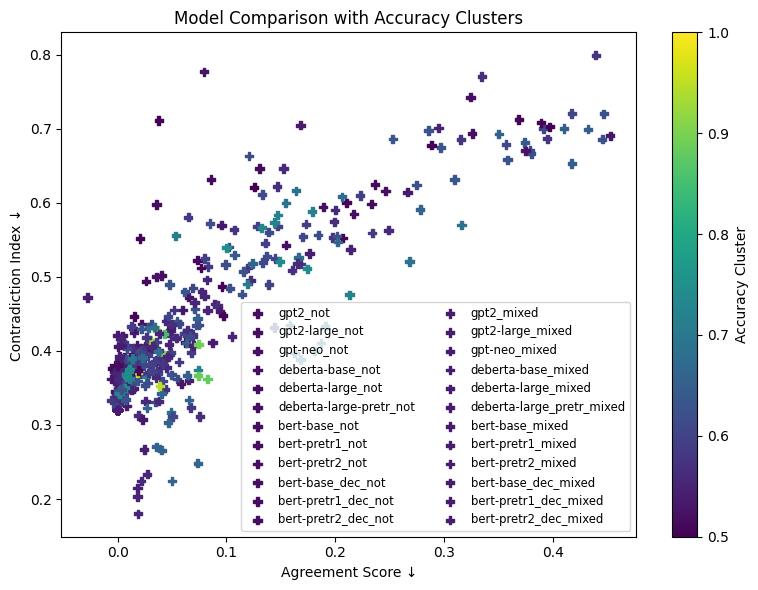

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))


# Нормализуем значения
#norm = mcolors.Normalize(vmin=min(all_acc_clusters), vmax=max(all_acc_clusters))
norm =mcolors.Normalize(vmin=0.5, vmax=1)
cmap = cm.get_cmap('viridis')  # или 'plasma', 'coolwarm' по вкусу



# not
plot_scatter(dec_base_table, 'P', 'gpt2_not')
plot_scatter(dec_large_table, 'P', 'gpt2-large_not')
plot_scatter(dec_neo_table, 'P', 'gpt-neo_not')

plot_scatter(enc_base_table, 'P', 'deberta-base_not')
plot_scatter(enc_large_table, 'P', 'deberta-large_not')
plot_scatter(enc_large_pretr_table, 'P', 'deberta-large-pretr_not')

plot_scatter(enc_dec_base_table, 'P', 'bert-base_not')
plot_scatter(enc_dec_hate_table, 'P', 'bert-pretr1_not')
plot_scatter(enc_dec_hate_table2, 'P', 'bert-pretr2_not')

plot_scatter(enc_dec_base_dec_table, 'P', 'bert-base_dec_not')
plot_scatter(enc_dec_hate_dec_table, 'P', 'bert-pretr1_dec_not')
plot_scatter(enc_dec_hate_dec_table2, 'P', 'bert-pretr2_dec_not')


# mixed
plot_scatter(dec_base_orig_table, 'P', 'gpt2_mixed')
plot_scatter(dec_large_orig_table, 'P', 'gpt2-large_mixed')
plot_scatter(dec_neo_orig_table, 'P', 'gpt-neo_mixed')

plot_scatter(enc_base_orig_table, 'P', 'deberta-base_mixed')
plot_scatter(enc_large_orig_table, 'P', 'deberta-large_mixed')
plot_scatter(enc_large_pretr_orig_table, 'P', 'deberta-large_pretr_mixed')

plot_scatter(enc_dec_base_orig_table, 'P', 'bert-base_mixed')
plot_scatter(enc_dec_hate_original_table, 'P', 'bert-pretr1_mixed')
plot_scatter(enc_dec_hate_original_table2, 'P', 'bert-pretr2_mixed')


plot_scatter(enc_dec_base_dec_orig_table, 'P', 'bert-base_dec_mixed')
plot_scatter(enc_dec_hate_original_dec_table, 'P', 'bert-pretr1_dec_mixed')
plot_scatter(enc_dec_hate_original_dec_table2, 'P', 'bert-pretr2_dec_mixed')

# Цветовая шкала
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy Cluster')

# Легенда по маркерам
ax.legend(loc='lower right', fontsize='small', ncol=2)

ax.set_xlabel('Agreement Score ↓')
ax.set_ylabel('Contradiction Index ↓')
ax.set_title('Model Comparison with Accuracy Clusters')

plt.tight_layout()
plt.show()

In [23]:
# Словарь: имя переменной (как строка) -> сама таблица
tables = {
    'decoder_base_ttt': dec_base_ttt_table,
    'decoder_large_ttt': dec_large_ttt_table,
    'decoder_neo_pretr_ttt': dec_neo_ttt_table,

    'enc_base_ttt': enc_base_ttt_table,
    'enc_large_ttt': enc_large_ttt_table,
    'enc_large_pretr_ttt': enc_large_pretr_ttt_table,

    'enc_dec_base_ttt': enc_dec_base_ttt_table,
    'enc_dec_base_decoder_ttt': enc_dec_base_dec_ttt_table,
    'enc_dec_hate_ttt': enc_dec_hate_ttt_table,
    'enc_dec_hate_decoder_ttt': enc_dec_hate_dec_ttt_table,
    'enc_dec_hate_ttt_table2': enc_dec_hate_ttt_table2,
    'enc_dec_hate_decoder_ttt_table2': enc_dec_hate_dec_ttt_table2,

    'decoder_base_not': dec_base_table,
    'decoder_large_not': dec_large_table,
    'decoder_neo_pretr_not': dec_neo_table,

    'enc_base_not': enc_base_table,
    'enc_large_not': enc_large_table,
    'enc_large_pretr_not': enc_large_pretr_table,

    'enc_dec_base_table_not' : enc_dec_base_table,
    'enc_dec_base_decoder_not': enc_dec_base_dec_table,
    'enc_dec_pretr_not': enc_dec_hate_table,
    'enc_dec_pretr_decoder_not': enc_dec_hate_dec_table,
    'enc_dec_pretr_table2_not': enc_dec_hate_table2,
    'enc_dec_pretr_decoder_table2_not': enc_dec_hate_dec_table2,

    'decoder_base_orig': dec_base_orig_table,
    'decoder_large_orig': dec_large_orig_table,
    'decoder_neo_pretr_orig': dec_neo_orig_table,

    'enc_base_orig': enc_base_orig_table,
    'enc_large_orig': enc_large_orig_table,
    'enc_large_pretr_orig': enc_large_pretr_orig_table,

    'enc_dec_base_orig': enc_dec_base_orig_table,
    'enc_dec_base_decoder_orig': enc_dec_base_dec_orig_table,
    'enc_dec_pretr_original': enc_dec_hate_original_table,
    'enc_dec_pretr_original_decoder': enc_dec_hate_original_dec_table,
    'enc_dec_pretr_original_table2': enc_dec_hate_original_table2,
    'enc_dec_pretr_original_decoder_table2': enc_dec_hate_original_dec_table2,
}

# Присваиваем индекс
for name, table in tables.items():
    table['index'] = name


In [24]:
# Объединение всех таблиц в один DataFrame
all_tables_merged = pd.concat(tables.values(), ignore_index=True)


In [25]:
def extract_group(index):
    if 'ttt' in index:
        return 'ttt'
    elif 'not' in index:
        return 'not'
    elif 'orig' in index or 'mixed' in index:
        return 'orig'
    else:
        return 'other'

all_tables_merged['dataset'] = all_tables_merged['index'].apply(extract_group)
all_tables_merged['finetune'] = all_tables_merged['index'].apply(lambda x: 'yes' if 'pretr' in x else 'no')
all_tables_merged['type'] = all_tables_merged['index'].apply(lambda x: 'decoder' if 'decoder' in x else 'encoder')


In [26]:
all_tables_merged['type'].value_counts()
all_tables_merged.to_csv('all_small_models.csv')

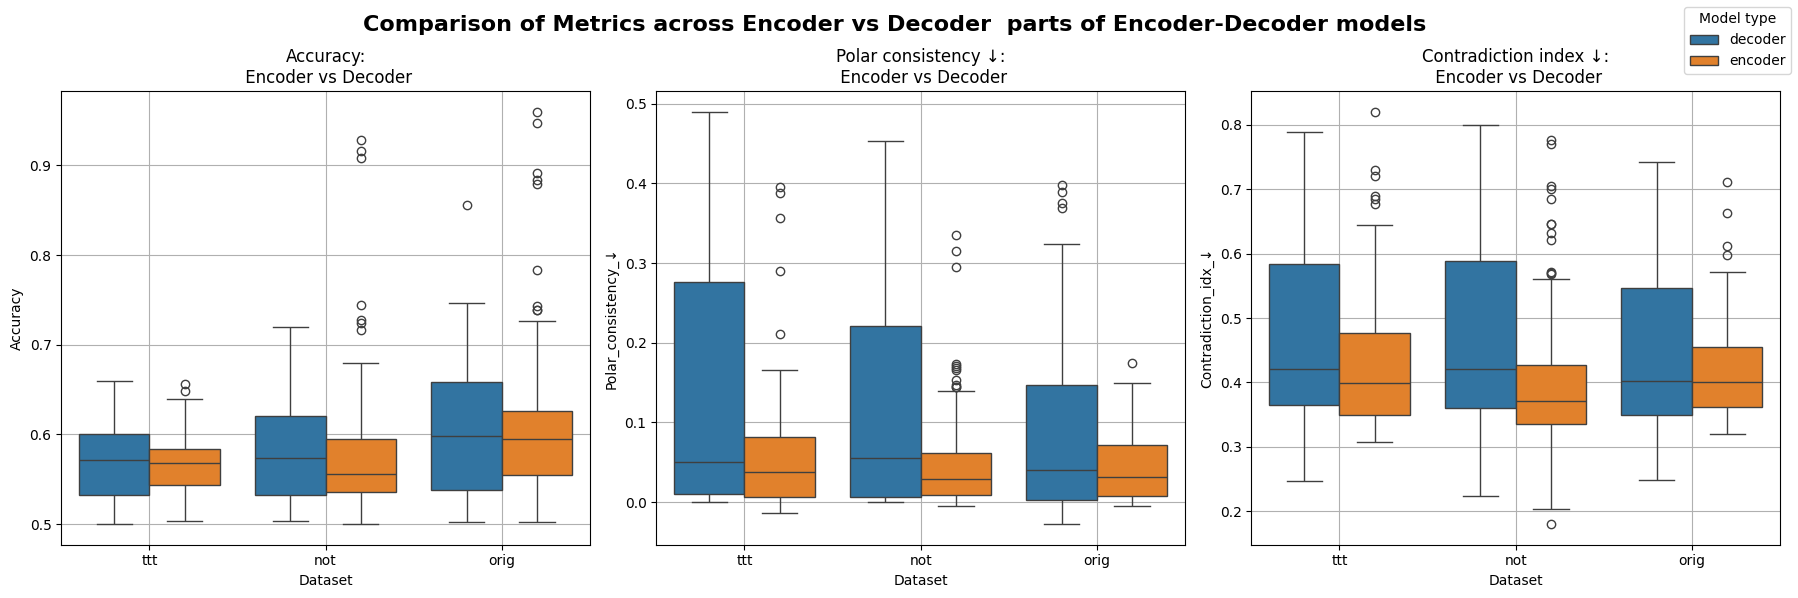

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

all_small_models = pd.read_csv('/Users/sabrinasadieh/Code/ccs_aisf/notebooks/metrics_eda/datasets/all_small_models.csv')

metrics = ['accuracy', 'polar_consistency_↓', 'contradiction_idx_↓']
titles = [
    'Accuracy:\n Encoder vs Decoder',
    'Polar consistency ↓:\n Encoder vs Decoder',
    'Contradiction index ↓:\n Encoder vs Decoder'
]


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    sns.boxplot(
        data=all_small_models, #[all_small_models['index'].apply(lambda x: 'enc_dec' in x)],
        x='dataset',
        y=metric,
        hue='type',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Dataset')
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);

# Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Model type', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 
plt.suptitle('Comparison of Metrics across Encoder vs Decoder  parts of Encoder-Decoder models', fontsize=16, weight='bold')
plt.show()

# fig.savefig('enc_dec_metrics.pdf')

1. Разделение есть, может потому что они достигают худшей точности разделения (кластеры по точности 1й и 2й, то есть все accuracy < 0.75)

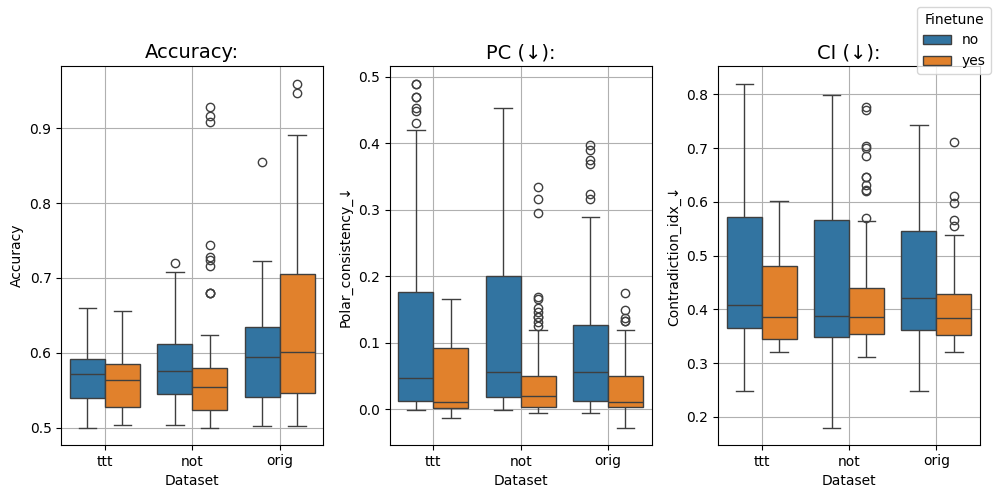

In [36]:

all_small_models = pd.read_csv('/Users/sabrinasadieh/Code/ccs_aisf/notebooks/metrics_eda/datasets/all_small_models.csv')

metrics = ['accuracy', 'polar_consistency_↓', 'contradiction_idx_↓']
titles = [
    'Accuracy:',
    'PC (↓):',
    'CI (↓):'
]

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=False)

for ax, metric, title in zip(axes, metrics, titles):
    sns.boxplot(
        data=all_small_models,
        x='dataset',
        y=metric,
        hue='finetune',
        ax=ax
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Dataset')
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Finetune', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # 
#plt.suptitle('Comparison of Metrics across pretrained (N=218) vs not pretrained (N=394) small models', fontsize=16, weight='bold')
plt.show()
#fig.savefig("finetune_small.pdf", format="pdf", bbox_inches="tight")


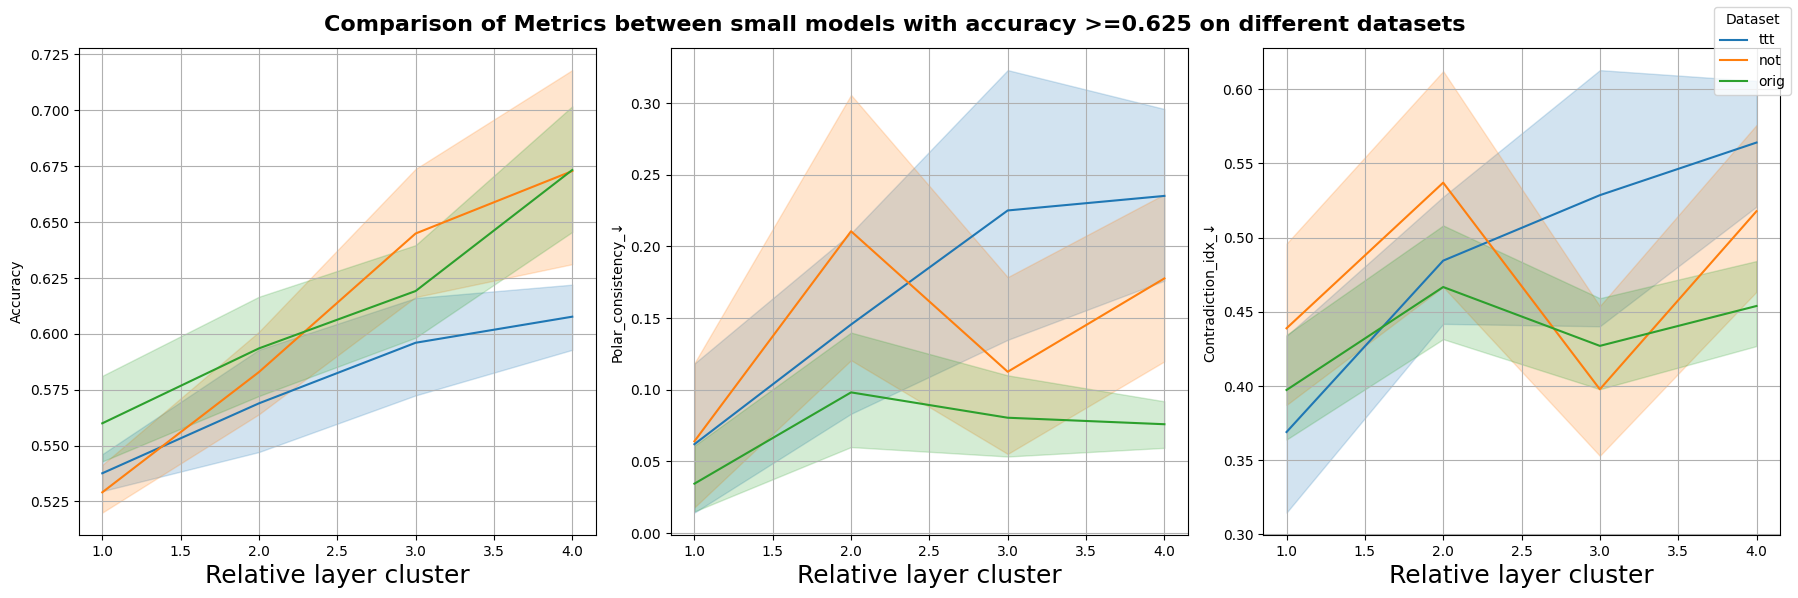

In [30]:
# Создаем фигуру с тремя подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

models_with_strong_perf_list = list(all_small_models.query('accuracy >= 0.625')['index'].value_counts().index)
slc_of_models_with_strong_perf = all_small_models[all_small_models['index'].apply(lambda x: x in models_with_strong_perf_list)]

for ax, metric, title in zip(axes, metrics, titles):
    sns.lineplot(
        data=slc_of_models_with_strong_perf,
        x='perc_cluster',
        y=metric,
        hue='dataset',
        ax=ax,
        errorbar=('ci', 95), # +- one std
    )
   # ax.set_title(title, fontsize=18)
    ax.set_xlabel('Relative layer cluster', fontsize=18)
    ax.set_ylabel(metric.capitalize())
    ax.legend_.remove()
    ax.grid(True);


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Dataset', loc='upper right', ncol=1)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.suptitle('Comparison of Metrics between small models with accuracy >=0.625 on different datasets', fontsize=16, weight='bold')
plt.show()
# fig.savefig("rnd_check_small.pdf", format="pdf", bbox_inches="tight")

In [31]:
slc_of_models_with_strong_perf_not = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "not"'
                        )

slc_of_models_with_strong_perf_ttt = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "ttt"'
                        )

slc_of_models_with_strong_perf_mixed = slc_of_models_with_strong_perf.groupby(
                    ['perc_cluster', 'dataset']
                    )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
                        np.mean
                        ).query(
                            'dataset == "orig"'
                        )

/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_15035/1861523186.py:3: FutureWarning: The provided callable <function mean at 0x10bd259e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_15035/1861523186.py:11: FutureWarning: The provided callable <function mean at 0x10bd259e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  )[['accuracy', 'polar_consistency_↓','contradiction_idx_↓']].agg(
/var/folders/3j/4bpmrzsj6q3f151lfj_j6fp00000gn/T/ipykernel_15035/1861523186.py:19: FutureWarning: The provided callable <function mean at 0x10bd259e0> is currently using DataFrameGroupBy.mean. In a future version 

In [32]:
np.mean(np.abs(slc_of_models_with_strong_perf_not.values - slc_of_models_with_strong_perf_ttt.values), axis=0)

array([0.03414722, 0.05930802, 0.07488924])

In [33]:
np.mean(np.abs(slc_of_models_with_strong_perf_mixed.values - slc_of_models_with_strong_perf_not.values), axis=0)

array([0.01692613, 0.06895752, 0.05125579])

In [34]:
np.sum(slc_of_models_with_strong_perf['accuracy'] >= 0.75)/len(slc_of_models_with_strong_perf) * 100

np.float64(3.3112582781456954)

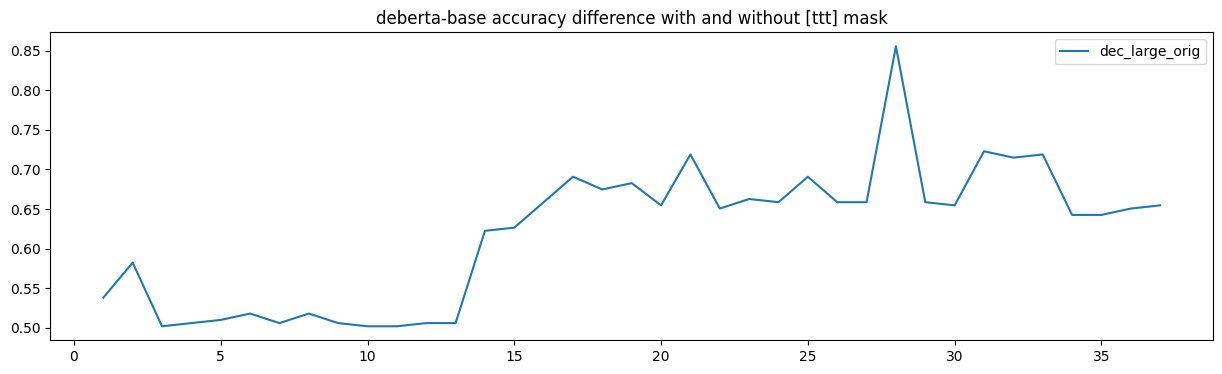

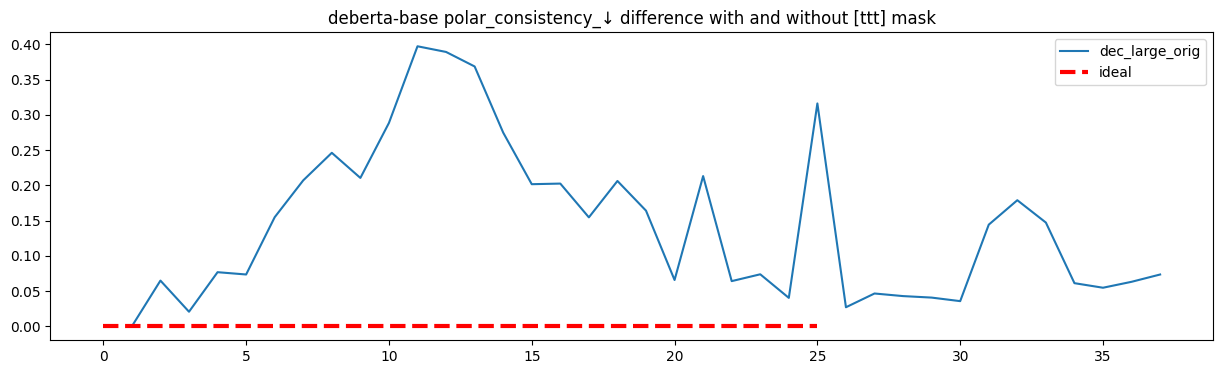

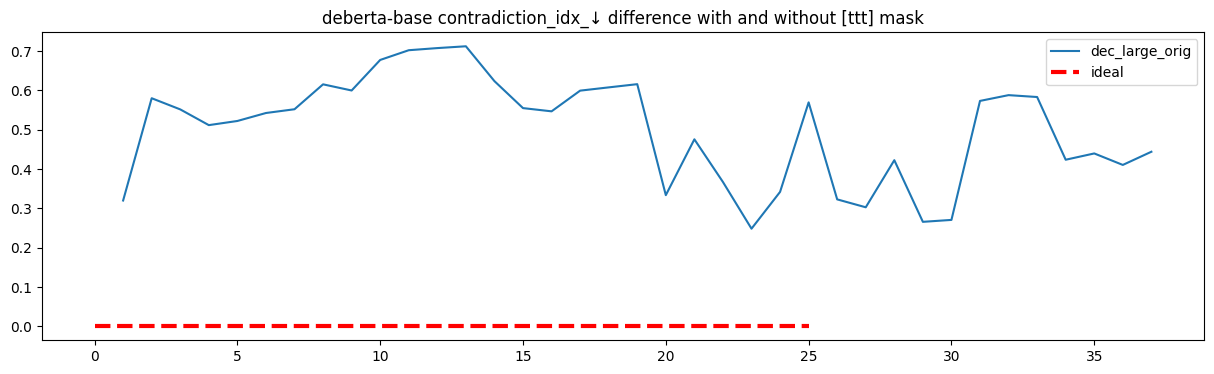

In [55]:
for idx, metric in enumerate(metrics):
    fig = plt.figure(figsize=(15, 4))
    plt.plot(all_small_models[all_small_models['index'].apply(lambda x: 'decoder_large_orig' in x)]['layer_number'],
             all_small_models[all_small_models['index'].apply(lambda x: 'decoder_large_orig' in x)][metric], label='dec_large_orig')
    
    # plt.plot(all_small_models[all_small_models['index'].apply(lambda x: 'enc_large_pretr_orig' in x)]['layer_number'], 
    #          all_small_models[all_small_models['index'].apply(lambda x: 'enc_large_pretr_orig' in x)][metric], label='enc_large_pretr')
    
    if idx != 0:
        plt.hlines(0, 0, 25, label='ideal', colors='red', linewidth=3, linestyles='--')
    plt.legend()
    plt.title('deberta-base '+metric+' difference with and without [ttt] mask')
    plt.show()

In [62]:
len(all_small_models[all_small_models['accuracy'].apply(lambda x: x>=0.75)]['index'].unique()) / len(all_small_models['index'].unique()) * 100

8.333333333333332

In [63]:
all_small_models[all_small_models['accuracy'].apply(lambda x: x>=0.75)]['index'].unique()

array(['enc_large_pretr_not', 'decoder_large_orig',
       'enc_large_pretr_orig'], dtype=object)

In [97]:
len(all_small_models.query('"ttt" not in index')) / len(all_small_models.query('"ttt" not in index').query('accuracy >=0.75'))

61.2

In [104]:
len(all_small_models.query('"ttt" not in index').query('accuracy >=0.75')) / len(all_small_models.query('"ttt" not in index')) * 100

1.6339869281045754